In [4]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 4: Logistic regression, hyperparameter optimization 
### Associated lectures: [Lectures 7, 8](https://github.com/UBC-CS/cpsc330-2025W1/tree/main/lectures) 

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html).**

## Imports 

In [5]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV, 
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [6]:
import hashlib


def my_sha1(text):
    return hashlib.sha1(text.encode("utf-8")).hexdigest()

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Instructions
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Group wotk instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


### General submission instructions

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
- **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.
  
- **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.
     
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.
     
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
- **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.
     
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
- **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 
   
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: implementing `DummyClassifier`
<hr>
rubric={autograde}

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.
 
As a reminder, `DummyClassifier` is meant as a baseline and is generally a simple "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's and 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get you started, I have given you a `return` statement in each case that returns the correct data type: 
- `fit` returns nothing
- `predict` returns an array whose size is the number of examples
- `predict_proba` returns an array whose size is the number of examples x 2, and
- `score` returns a float

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data. **Your `score` function should call your `predict` function**. Again, you can compare with `DummyClassifier` using the code below.

`sklearn`'s `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "eagle", etc. However, for the sake of simplifying this question, we will consider **binary classification** only. Furthermore, we will assume that these classes are encoded as 0 and 1. In other words, you can safely assume that the variable y contains only 0's and 1's

<div class="alert alert-warning">

Solution_1
    
</div>

In [42]:
class MyDummyClassifier:
    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0's and 1's.
    """

    def fit(self, X, y):
        n0 = np.sum(y == 0)
        n1 = y.size - n0
        self.majority_class_ = np.argmax([n0, n1])
        total = y.size
        self.class_probs_ = np.array([n0 / total, n1 / total], dtype=float)
        return None

    def predict(self, X):
        return np.full(X.shape[0], self.majority_class_, dtype=int)
        

    def predict_proba(self, X):
        """
        Predict class probabilities for the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.

        Returns:
        - probs (array-like, shape (n_samples, 2)): Predicted class probabilities.
          Column 0 corresponds to class 0, and column 1 corresponds to class 1.
        """
        return np.tile(self.class_probs_, (X.shape[0], 1))

    def score(self, X, y):
        """
        Calculate the accuracy of the model on the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.
        - y (array-like, shape (n_samples,)): True target labels.

        Returns:
        - accuracy (float): Accuracy of the model on the input data.
        """
        y_pred = self.predict(X)
        return float(np.mean(y_pred == y))

Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore the different cases (or automate this with a loop or random seeds).

In [43]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

Below are some tests for `predict_proba`.

In [44]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

Below are some tests for `score`.

_Points:_ 10

In [45]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

In [46]:
grader.check("q1")

q1 results: All test cases passed!

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be working with a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` under the data directory in this folder. As usual, please do not submit the dataset when you submit the assignment. 

In [47]:
tweets_df = pd.read_csv("data/realdonaldtrump.csv", index_col=0)
tweets_df.head()

,link,content,date,retweets,favorites,mentions,hashtags
id,,,,,,,
1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [48]:
tweets_df.shape

(43352, 7)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [49]:
y = tweets_df["retweets"] > 10_000
y.value_counts()

retweets
False    31939
True     11413
Name: count, dtype: int64

To make predictions, we'll be using only the content (text) of the tweet. 

In [50]:
X = tweets_df["content"]

For the purpose of this assignment, you can ignore all the other columns in the original dataset.

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

### 2.1 Ordering the steps
rubric={points}

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

**Your tasks:**
1. Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
2. Add a short comment above each step to describe what the code is doing.

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 3

In [53]:
#define a CountVectorizer that converts text into token counts
countvec = CountVectorizer(stop_words="english")

# define a classifer, the high max_iter is to avoid convergence warning
lr = LogisticRegression(max_iter=1000, random_state=123)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.6, random_state=123
)
# define preprocessing pipeline and model so that CV fits the vectorizor on each training fold without leakage
pipe = make_pipeline(countvec, lr)



# Obtain the cross validation score to estimate generalization performance
cv_score = cross_val_score(pipe, X_train, y_train).mean()
print(cv_score)



0.8953863898500576


In [54]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

### 2.2 Baseline
rubric={autograde}

**Your tasks:**

1. Run 5-fold cross-validation with `sklearn`'s `DummyClassifier` on this dataset. Store the mean cross-validation score in a variable called `dummy_cv_score` given below.

> You should be able to use `MyDummyClassifier` above. But sklearn will likely complain if you try to pass it to `cross_val_score` or `cross_validate`. 

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

In [61]:


dummy = DummyClassifier(random_state=123)
dummy_cv_score = cross_val_score(dummy, X_train, y_train, cv=5, scoring="accuracy").mean()
dummy_cv_score




np.float64(0.7423875432525952)

In [62]:
grader.check("q2.2")

q2.2 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.3 Discussion
rubric={points}

**Your tasks:**

1. Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
2. Above we averaged the scores from the 5 folds of cross-validation of logistic regression. Print out the 5 individual scores. Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores. 
3. Are the 5 scores close to each other or spread far apart? (This is a bit subjective, answer to the best of your ability.) 

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

1. Yes, the logistic regression increased the CV score which implies a error reduction from ~.25 to ~.1, over a 
50% reduction.
3. The 5 scores are extremely close together, with 3 of them being essentially identical

In [67]:
print("2.", cross_val_score(dummy, X_train, y_train, cv=5, scoring="accuracy"))

2. [0.74221453 0.74221453 0.74250288 0.74250288 0.74250288]


In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

### 2.4 Probability scores
rubric={autograde}

Here we train a logistic regression classifier on the entire training set: 

In [69]:
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english"),
    LogisticRegression(max_iter=1000, random_state=123),
)
pipe_lr.fit(X_train, y_train);

**Your tasks:**

1. Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Store the tweet and the associated probability in the variables `tweet` and `prob`, respectively. 

> Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

<div class="alert alert-warning">

Solution_2.4
    
</div>

_Points:_ 4

In [78]:
pos = np.where(pipe_lr.named_steps["logisticregression"].classes_ == 1)[0][0]
probs = pipe_lr.predict_proba(X_test)[:, pos]
i = probs.argmax()
tweet = X_test.iloc[i]
prob = probs[i]   

...

Ellipsis

In [79]:
grader.check("q2.4")

q2.4 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 2.5 Coefficients
rubric={points}

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `Pipeline` object as follows:

In [82]:
vec_from_pipe = pipe_lr.named_steps["countvectorizer"]
lr_from_pipe = pipe_lr.named_steps["logisticregression"]

**Your tasks:**

Display the top 5 and bottom 5 words, together with their corresponding coefficients learned by the logistic regression model.

<div class="alert alert-warning">

Solution_2.5
    
</div>

_Points:_ 4

In [86]:
feat = vec_from_pipe.get_feature_names_out()
w    = lr_from_pipe.coef_.ravel() 
order = np.argsort(w)
bottom5 = list(zip(feat[order[:5]],  w[order[:5]]))          
top5    = list(zip(feat[order[-5:]][::-1], w[order[-5:]][::-1])) 

print("Top 5")
for word, weight in top5:
    print(f"{word}\t{weight:.4f}")

print("\nBottom")
for word, weight in bottom5:
    print(f"{word}\t{weight:.4f}")

Top 5
democrats	2.5224
transcripts	2.4164
harassment	2.3934
coronavirus	2.2002
fake	2.0701

Bottom
realdonaldtrump	-3.1542
barackobama	-2.1965
trump2016pic	-2.0033
donaldtrump	-1.9885
thanks	-1.8202


<!-- END QUESTION -->

<br><br>

### 2.6 Running a cross-validation fold without sklearn tools 
rubric={autograde}

Sklearn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. 

**Your tasks:**

1. Compute logistic regression's validation score on the first fold, that is, train on 80% and validate on 20% of the training data (`X_train`) without using sklearn `Pipeline` or `cross_validate` or `cross_val_score`. Store the score of the fold in a variable called `fold_score`. Recall that `cross_validation` in `sklearn` does not shuffle the data by default.    

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split with `train_test_split` and `shuffle=False`):
> Note: avoid assigning the variable names `X_train`, `y_train`, `X_test`, `y_test` to your folds when you call `train_test_split`. You'll be using those again later in the assignment.

In [87]:
countvec = CountVectorizer(stop_words="english")
lr = LogisticRegression(max_iter=1000, random_state=123)

> Meta-comment: you might be wondering why we're going into "implementation" here if this course is about _applied_ ML. In CPSC 340, we would go all the way down into `LogisticRegression` and understand how `fit` works, line by line. Here we're not going into that at all, but I still think this type of question (and Exercise 1) is a useful middle ground. I do want you to know what is going on in `Pipeline` and in `cross_validate` even if we don't cover the details of `fit`. To get into logistic regression's `fit` requires a bunch of math; here, we're keeping it more conceptual and avoiding all those prerequisites.

<div class="alert alert-warning">

Solution_2.6
    
</div>

_Points:_ 8

In [94]:
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False
)


X_tr_counts  = countvec.fit_transform(X_tr)
X_val_counts = countvec.transform(X_val)
lr.fit(X_tr_counts, y_tr)
fold_score = lr.score(X_val_counts, y_val)

fold_score

...

Ellipsis

In [95]:
fold_score

0.9008073817762399

In [96]:
grader.check("q2.6")

q2.6 results: All test cases passed!

<br><br><br><br>

## Exercise 3: Hyperparameter optimization
<hr>

<!-- BEGIN QUESTION -->

### 3.1 Optimizing `max_features` of `CountVectorizer`
rubric={points}

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. 

**Your tasks:**
- Based on the plot/output, what value of `max_features` seems best? Briefly explain.

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

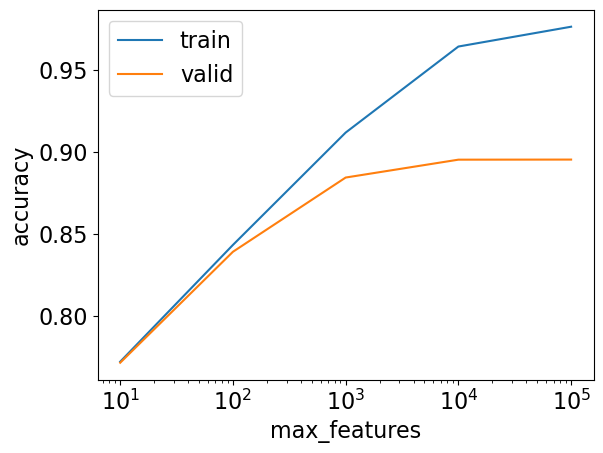

In [97]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10_000, 100_000]

for mf in max_features:
    #     print(mf)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=mf),
        LogisticRegression(max_iter=1000, random_state=123),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features");
plt.ylabel("accuracy");

In [99]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

,max_features,train,cv
0,10,0.772131,0.771511
1,100,0.843339,0.839158
2,1000,0.911851,0.884429
3,10000,0.964317,0.895329
4,100000,0.976399,0.895386


<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 2

100,000 since it has the highest cv score

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Optimizing `C` of `LogisticRegression`
rubric={points}

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. 

**Your tasks:**

- Based on the plot, what value of `C` seems best? Briefly explain. 

> The code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

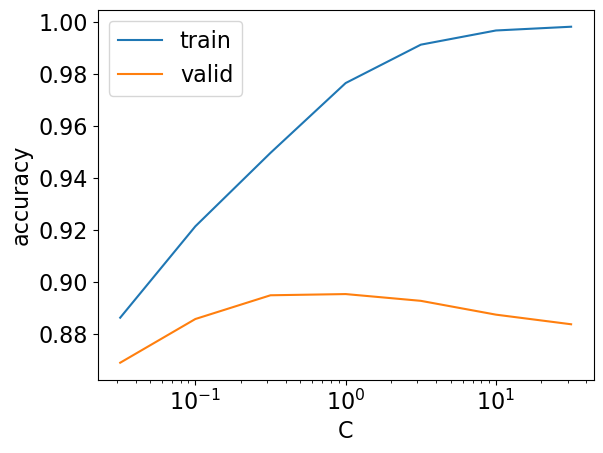

In [100]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-1.5, 2, 0.5)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english"),
        LogisticRegression(max_iter=1000, C=C, random_state=123),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [101]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

,C,train,cv
0,0.031623,0.886318,0.869031
1,0.100000,0.921396,0.885813
2,0.316228,0.949596,0.894925
3,1.000000,0.976399,0.895386
4,3.162278,0.991133,0.892791
5,10.000000,0.996583,0.887486
6,31.622777,0.998025,0.883795


<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

### 3.3 Jointly optimizing `max_features` of `CountVectorizer` and `C` of `LogisticRegression` using `GridSearchCV`
rubric={autograde}

So far we have been writing loops to try a bunch of different hyperparameter values and pick the one with lowest cross-validation error. This operation is so common that `scikit-learn` has some built-in classes to do it for you. In this and the next exercise, we will explore two such classes:

1. [`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 
2. [`sklearn.model_selection.RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Start with the pipeline `pipe_lr` below.

**Your tasks:**
- Create a `GridSearchCV` object named `grid_search` to jointly optimize `max_features` of `CountVectorizer` and `C` of `LogisticRegression` across all the combinations of values we tried above. 
- What are the best values of `max_features` and `C` according to your grid search? Store them in variables `best_max_features` and `best_C`, respectively.  
- Store the best score returned by the grid search in a variable called `best_score`. 

> The code might be a bit slow here. Setting `n_jobs=-1` should speed it up if you have a multi-core processor.

In [ ]:
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english"),
    LogisticRegression(max_iter=1000, random_state=123),
)

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

In [127]:
param_grid = {
    "countvectorizer__max_features": [10, 100, 1000, 10000, 100000],
    "logisticregression__C": [0.031623, 0.1, 0.316228, 1.0, 3.162278, 10.0, 31.622777],
}



grid_search = GridSearchCV(
    pipe_lr, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_max_features = grid_search.best_params_["countvectorizer__max_features"]
best_C = grid_search.best_params_["logisticregression__C"]
best_score = grid_search.best_score_

...

Ellipsis

In [128]:
best_max_features

100000

In [129]:
best_C

1.0

In [130]:
best_score

np.float64(0.8953863898500576)

In [131]:
grader.check("q3.3")

q3.3 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.4 Jointly optimizing `max_features` of `CountVectorizer` and `C` of `LogisticRegression` with `RandomizedSearchCV`
rubric={points}

**Your tasks:**

1. Jointly optimize `C` hyperparameter for the `LogisticRegression`, as well as the `max_features` hyperparameter for the `CountVectorizer` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Choose reasonable ranges or distributions for the hyperparameters, using either a parameter grid or appropriate distributions at your discretion.
2. Display the best hyperparameter values and the best score found. 

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 5

In [136]:
 
param_dist = {
    "logisticregression__C": np.logspace(-3, 2, 50),
    "countvectorizer__max_features": [10, 100, 1000, 10000, 100000],
}

rand_search = RandomizedSearchCV(
    estimator=pipe_lr,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=123,
)
rand_search.fit(X_train, y_train)

best_max_features = rand_search.best_params_["countvectorizer__max_features"]
best_C = rand_search.best_params_["logisticregression__C"]
best_score = rand_search.best_score_

In [137]:
print(best_max_features)
print(best_C)
print(best_score)

100000
1.4563484775012443
0.8942329873125722


In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.5 Discussion 
rubric={points}

- Do the best hyperparameter values found through grid search and random search match each other and the results you obtained in 3.1 and 3.2?
- More generally, should these values be expected to match the ones you found in parts 3.1 and 3.2? Why or why not?

<div class="alert alert-warning">

Solution_3.5
    
</div>

_Points:_ 2

Best max features match, but the best C differs when using randomizedsearchcv at 1.45 instead of 1.0. The values should generally be expected to be around the same, but might not be exactly identical since they are still using different methods and there is probably some natural variance.

<!-- END QUESTION -->

<br><br>

### 3.6 Test score
rubric={autograde}

**Your tasks:**
- Evaluate your final model on the test set. Store the test accuracy in the variable called `test_score`.

<div class="alert alert-warning">

Solution_3.6
    
</div>

_Points:_ 2

In [142]:
test_score = grid_search.best_estimator_.score(X_test, y_test)

...

Ellipsis

In [143]:
grader.check("q3.6")

q3.6 results: All test cases passed!

<br><br>

<!-- BEGIN QUESTION -->

### 3.7 Discussion
rubric={points}

- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

<div class="alert alert-warning">

Solution_3.7
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

## Exercise 4: Very short answer questions
<hr>
rubric={points}

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`? 
2. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
3. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?

<div class="alert alert-warning">

Solution_4
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Here is a quick checklist before submitting: 

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large and doesn't render on Gradescope, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html).  

Congratulations on finishing the homework! 

![](./img/eva-well-done.png)